Ich lade das Modul tsclassifier ein!
Trainingsepoche #1 / 20 startet.
	Batch #250 / 1226
	Batch #500 / 1226
	Batch #750 / 1226
	Batch #1000 / 1226
Trainingsepoche #1 / 20:
	 Benötigte Dauer: 0:00:51.241540
	 acc=80.40 %


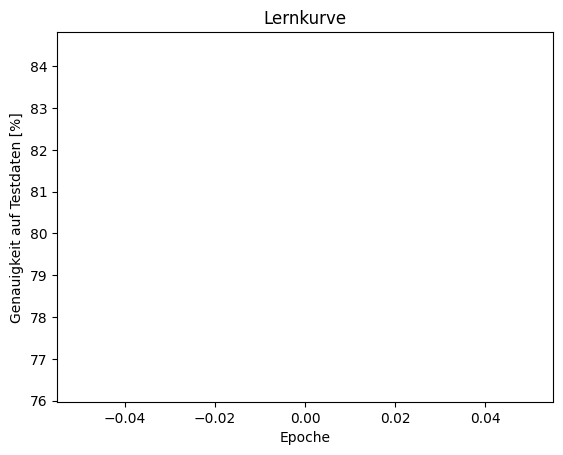

Trainingsepoche #2 / 20 startet.
	Batch #250 / 1226
	Batch #500 / 1226
	Batch #750 / 1226
	Batch #1000 / 1226
Trainingsepoche #2 / 20:
	 Benötigte Dauer: 0:00:50.778171
	 acc=84.35 %


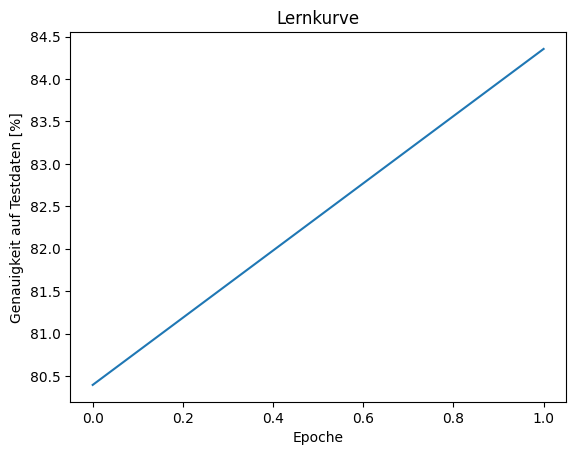

Trainingsepoche #3 / 20 startet.
	Batch #250 / 1226
	Batch #500 / 1226
	Batch #750 / 1226
	Batch #1000 / 1226
Trainingsepoche #3 / 20:
	 Benötigte Dauer: 0:00:50.307833
	 acc=86.21 %


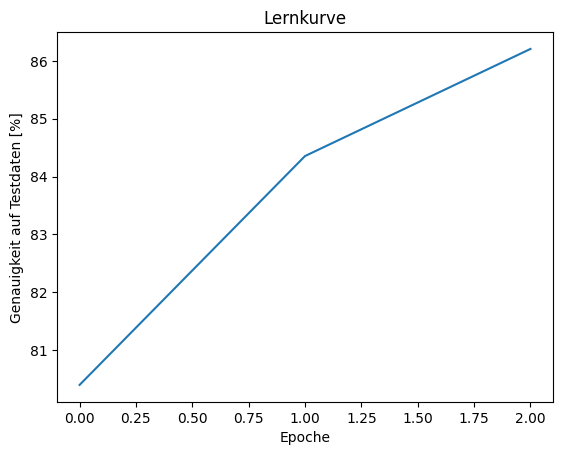

Trainingsepoche #4 / 20 startet.
	Batch #250 / 1226
	Batch #500 / 1226
	Batch #750 / 1226
	Batch #1000 / 1226
Trainingsepoche #4 / 20:
	 Benötigte Dauer: 0:00:50.787354
	 acc=86.89 %


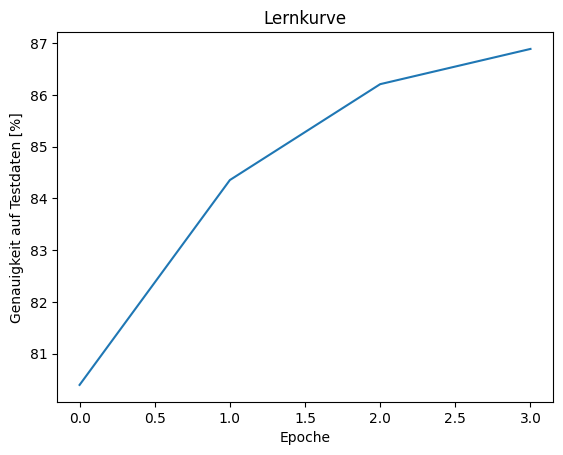

Trainingsepoche #5 / 20 startet.
	Batch #250 / 1226
	Batch #500 / 1226
	Batch #750 / 1226
	Batch #1000 / 1226
Trainingsepoche #5 / 20:
	 Benötigte Dauer: 0:00:52.058732
	 acc=89.56 %


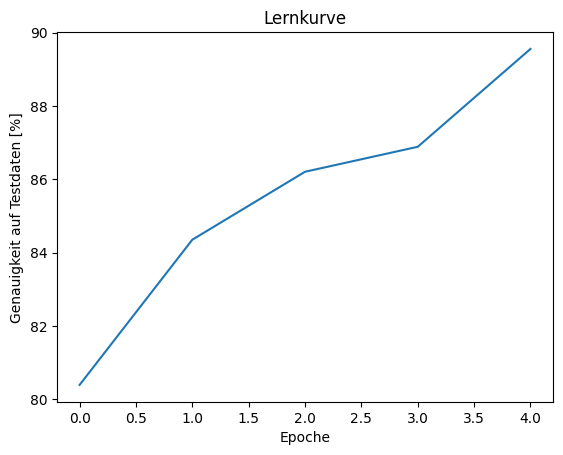

Trainingsepoche #6 / 20 startet.
	Batch #250 / 1226
	Batch #500 / 1226
	Batch #750 / 1226
	Batch #1000 / 1226
Trainingsepoche #6 / 20:
	 Benötigte Dauer: 0:00:50.930719
	 acc=87.47 %


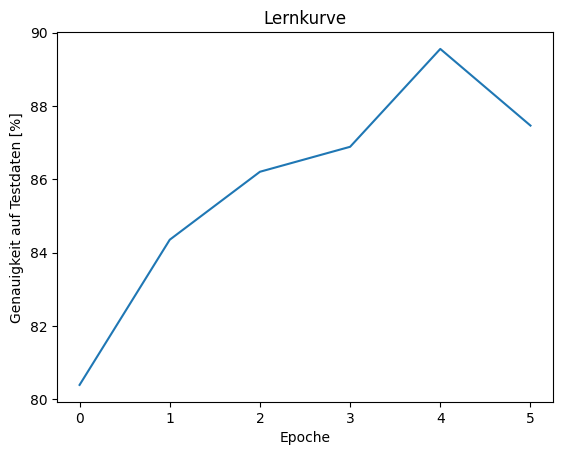

Trainingsepoche #7 / 20 startet.
	Batch #250 / 1226


In [ ]:
import tsclassifier

# 1. Bestimme, ob wir auf der GPU oder CPU arbeiten
import torch
device = torch.device("cuda" if torch.cuda.is_available else "cpu")

# 2. Erzeuge ein CNN und schiebe es auf das Device
model = tsclassifier.CNN4TSRecognition().to(device)

# 3. Bereite Trainings- und Testdaten vor
train_loader, test_loader = tsclassifier.get_data_loaders()

# 4. Trainiere das CNN
accs = tsclassifier.train_model(model, device, 20, train_loader, test_loader)